![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación librerías
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras import backend as K
from livelossplot import PlotLossesKeras
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


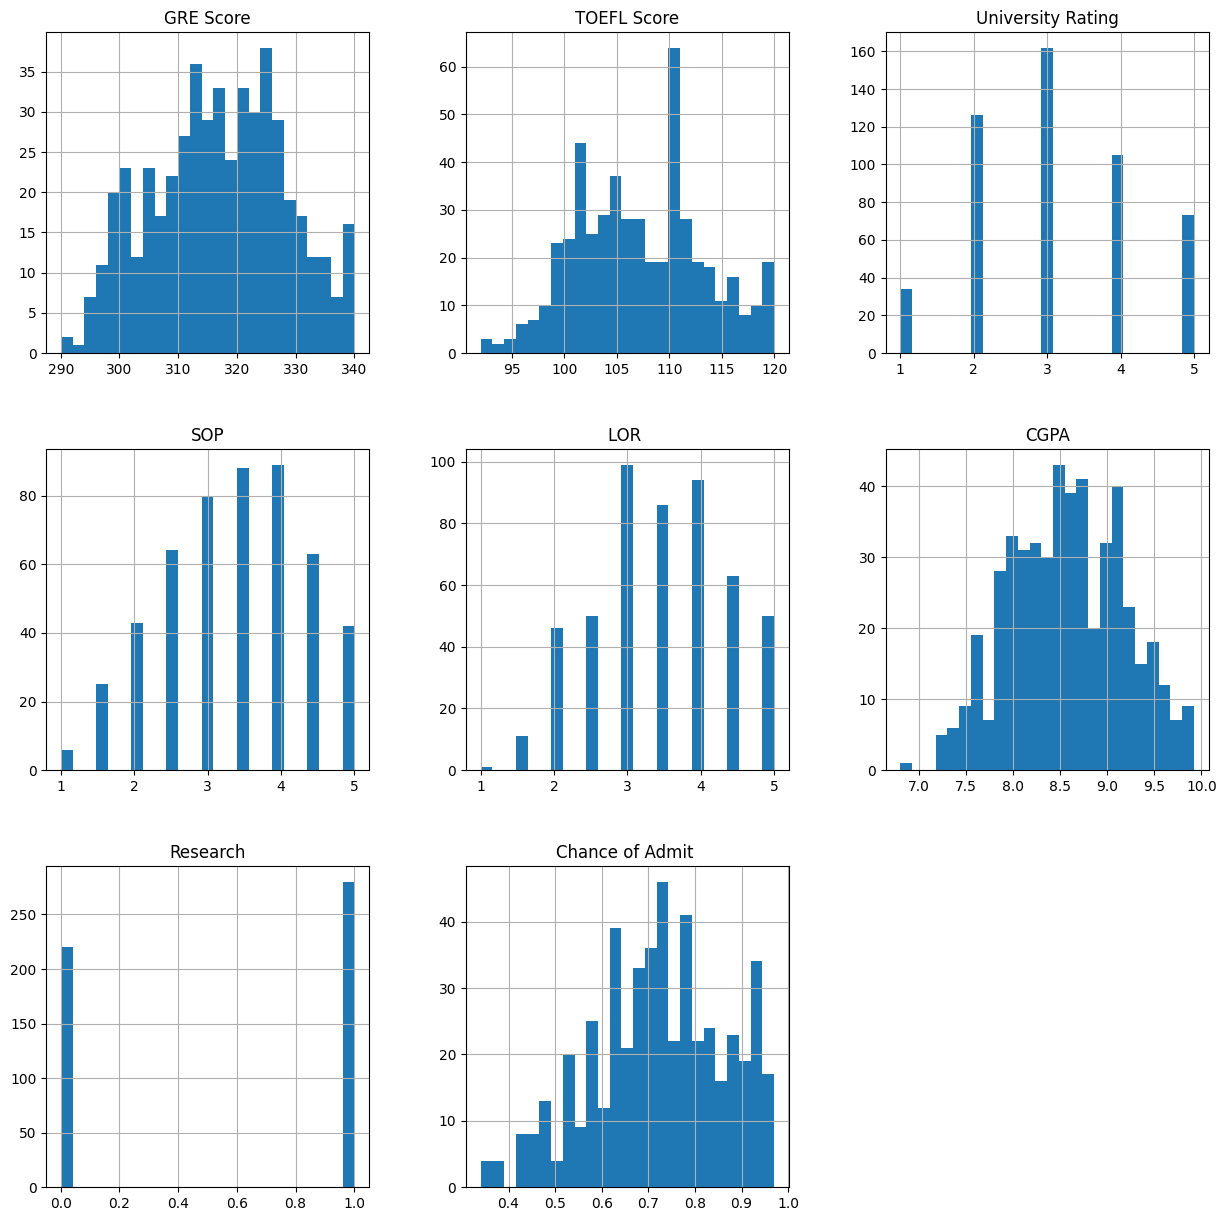

In [ ]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [ ]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [ ]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Celda 1
from sklearn.preprocessing import StandardScaler

#Estandarización
scaler = StandardScaler()
scaler.fit(X)

X_train = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

X_train = np.array(X_train)
Y_train = np.array(yTrain)

X_test = np.array(X_test)
Y_test = np.array(yTest)

output_var = 1
dims = X_train.shape[1]

In [ ]:
K.clear_session()
RN_1 = Sequential()
RN_1.add(Dense(output_var, input_shape=(dims,)))
print(RN_1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8 (32.00 Byte)
Trainable params: 8 (32.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


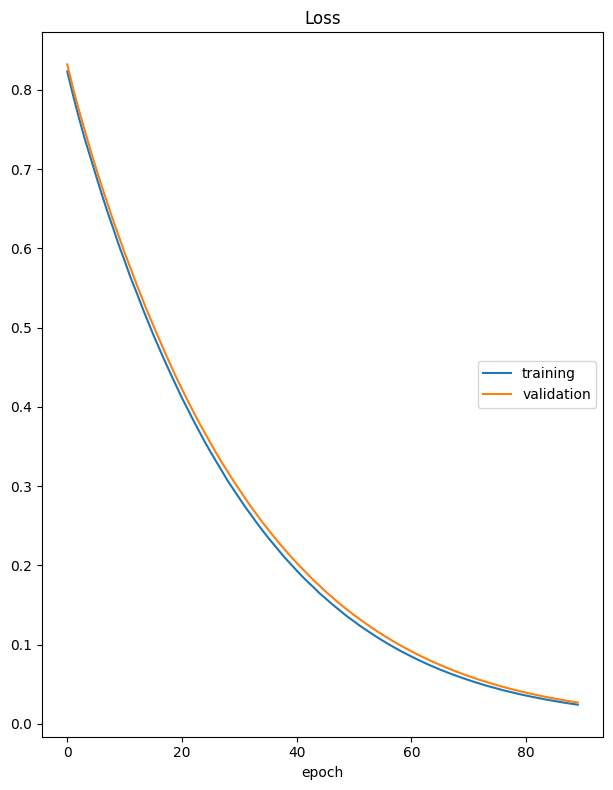

Loss
	training         	 (min:    0.024, max:    0.823, cur:    0.024)
	validation       	 (min:    0.027, max:    0.832, cur:    0.027)
11/11 [==============================] - 0s 41ms/step - loss: 0.0243 - val_loss: 0.0271


In [ ]:
# Definición de función de perdida, Optimizador
RN_1.compile(optimizer='adam', loss='mean_squared_error')
RN_1.fit(X_train, Y_train,
          verbose=1,
          epochs=90,
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

In [ ]:
y_predicted1 = RN_1.predict(X_test)
MAE_1 = mean_absolute_error(Y_test, y_predicted1)
MSE_1 = mean_squared_error(Y_test, y_predicted1)

print("El MAE del modelo estimado es: " + str(MAE_1))
print("El MSE del modelo estimado es: " + str(MSE_1))

5/5 [==============================] - 0s 2ms/step
El MAE del modelo estimado es: 0.13209851582845053
El MSE del modelo estimado es: 0.027057118440421024


Para la estimación de la red neuronal de una sola capa, se empezó con una estandarización de las variables predictoras con el objetivo de eliminar posibles imperfecciones en los datos que puedan afectar o sesgar el rendimiento o los resultados del modelo.

Se eligió un optimizador adaptativo (adam) ya que posee una característica interesante dentro de su funcionamiento, y es que a diferencia de SGD, que mantiene una tasa de aprendizaje única durante el entrenamiento, Adam calcula dinámicamente tasas de aprendizaje individuales, lo que deriva en un modelo más robusto y mejor ajustado a los datos disponibles.

Cómo función de pérdida se utilizó mean_squared_error, siendo una opción adecuada para el problema de regresión que se está tratando.

El numero de épocas se estableció en 90, al observarse que es un número en el que las pérdidas se estabilizan tanto para la muestra de prueba como de entrenamiento.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Celda 2
# K.clear_session()
RN_2 = Sequential()
RN_2.add(Dense(150, input_shape=(dims,),activation='relu')) #Primera capa
RN_2.add(Dense(100,activation='relu')) #Segunda capa
RN_2.add(Dense(output_var)) #Capa de salida

print(RN_2.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               1200      
                                                                 
 dense_1 (Dense)             (None, 100)               15100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 16401 (64.07 KB)
Trainable params: 16401 (64.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


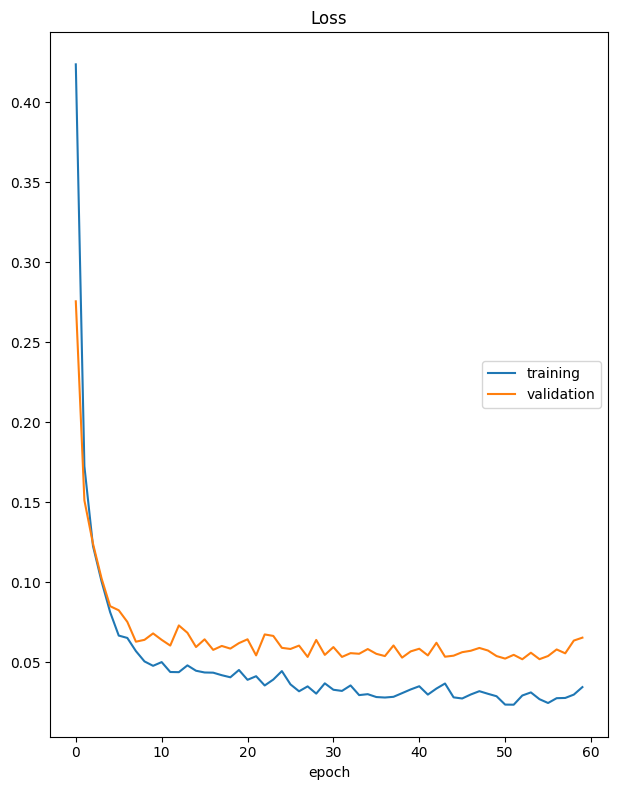

Loss
	training         	 (min:    0.023, max:    0.424, cur:    0.034)
	validation       	 (min:    0.052, max:    0.276, cur:    0.065)
11/11 [==============================] - 1s 66ms/step - loss: 0.0344 - val_loss: 0.0653


In [ ]:
RN_2.compile(optimizer='adam', loss='mean_absolute_error')
RN_2.fit(X_train, Y_train,
          verbose=1,
          epochs=50,
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

In [ ]:
y_predicted2 = RN_2.predict(X_test)
MAE_2 = mean_absolute_error(Y_test, y_predicted2)
MSE_2 = mean_squared_error(Y_test, y_predicted2)

print("El MAE del modelo estimado es: " + str(MAE_2))
print("El MSE del modelo estimado es: " + str(MSE_2))

5/5 [==============================] - 0s 3ms/step
El MAE del modelo estimado es: 0.06533570063114166
El MSE del modelo estimado es: 0.006940954945408511


Para la red neuronal de dos capas se siguió el siguiente procedimiento:

Primera capa: 150 neuronas (se consideró un número suficiente para generar un modelo apropiado y al mismo tiempo no se buscó exigir demasiado la capacidad computacional disponible).

Segunda capa: 100 neuronas (se redujo el número de neuronas para la segunda capa buscando reducir el tiempo de procesamiento y no complejizar demasiado al modelo).

Para la función de perdida se utilizó mean_absolute_error para continuar adaptando el algoritmo al problema de regresión que se busca resolver.

El numero de épocas se actualizó a 50 para reducir la complejidad del modelo. Evidenciando que al aumentar el número de epocas no se obtiene un beneficio significativo en el desempeño del modelo.  

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Celda 3
K.clear_session()
RN_3 = Sequential()
RN_3.add(Dense(150, input_shape=(dims,),activation='relu')) #Primera capa
RN_3.add(Dropout(0.2))
RN_3.add(Dense(100,activation='sigmoid')) #Segunda capa
RN_3.add(Dropout(0.2))
RN_3.add(Dense(50,activation='relu')) #Tercera capa
RN_3.add(Dropout(0.2))
RN_3.add(Dense(25,activation='sigmoid')) #Cuarta capa
RN_3.add(Dropout(0.2))
RN_3.add(Dense(output_var)) #Capa de salida

print(RN_3.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               1200      
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               15100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 25)                1

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

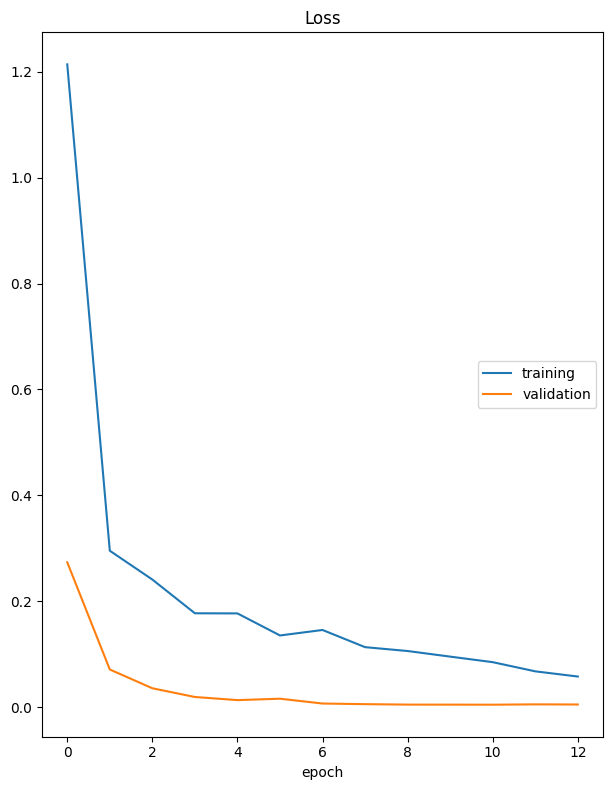

Loss
	training         	 (min:    0.058, max:    1.214, cur:    0.058)
	validation       	 (min:    0.005, max:    0.274, cur:    0.005)
11/11 [==============================] - 0s 40ms/step - loss: 0.0579 - val_loss: 0.0051
Epoch 13: early stopping


In [ ]:
RN_3.compile(optimizer='adam', loss='mean_squared_error')
RN_3.fit(X_train, Y_train,
          verbose=1,
          epochs=50,
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras(),best_model, early_stop])

In [ ]:
y_predicted3 = RN_3.predict(X_test)
MAE_3 = mean_absolute_error(Y_test, y_predicted3)
MSE_3 = mean_squared_error(Y_test, y_predicted3)

print("El MAE del modelo estimado es: " + str(MAE_3))
print("El MSE del modelo estimado es: " + str(MSE_3))

5/5 [==============================] - 0s 3ms/step
El MAE del modelo estimado es: 0.054334142239888514
El MSE del modelo estimado es: 0.005113988417664861


Para la red de múltiples capas se hicieron los siguientes ajustes:

Para la primera capa (entrada) se utilizaron 150 neuronas en busca de un procesamiento inicial exhaustivo, con una función de activación ReLU que elimine valores negativos.

A partír de la segunda capa se empezó a reducir el número de neuronas y con esto, también se redujo la complejidad del modelo. Además se introdujo una función de activación sigmoide para dinamizar el comportamiento del modelo y lograr una red más completa para una mejor adaptación a los datos disponibles.

A cada capa se le añadió su propia Dropout Layer, con una tasa de 0.2 (indicando que el 20% de los nodos pueden ignorarse en cada capa durante la fase de entrenamiento), en busca de reducir las chances de overfitting en el modelo final.

Finalmente se decidió utilizar 50 epocas al igual que en modelos anteriores, dando cómo resultado que con early-stopping tan solo 11 lograron ser suficientes.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

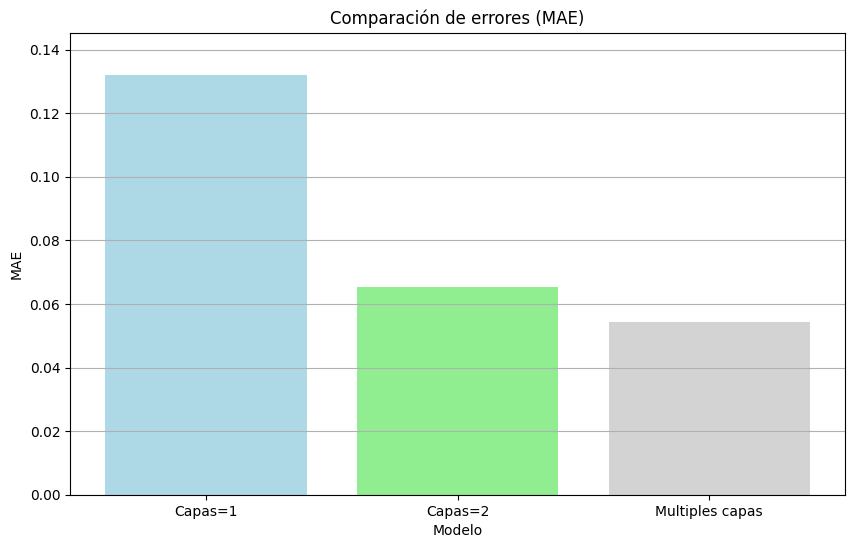

In [ ]:
# Celda 4
model_names = ['Capas=1', 'Capas=2', 'Multiples capas']
errors = [MAE_1, MAE_2, MAE_3]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, errors, color=['lightblue', 'lightgreen', 'lightgray'])

plt.xlabel('Modelo')
plt.ylabel('MAE')
plt.title('Comparación de errores (MAE)')
plt.ylim(0, max(errors) * 1.1)
plt.grid(axis='y')
plt.show()

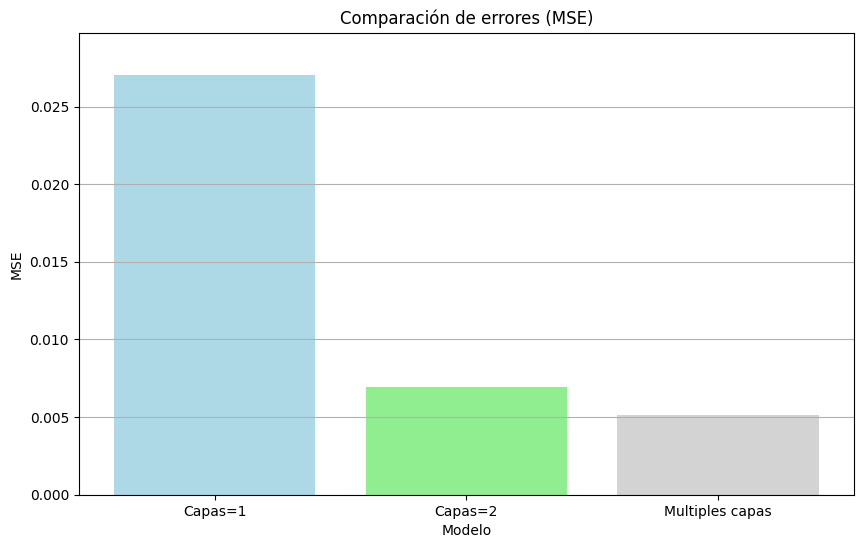

In [ ]:
model_names = ['Capas=1', 'Capas=2', 'Multiples capas']
errors = [MSE_1, MSE_2, MSE_3]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, errors, color=['lightblue', 'lightgreen', 'lightgray'])

plt.xlabel('Modelo')
plt.ylabel('MSE')
plt.title('Comparación de errores (MSE)')
plt.ylim(0, max(errors) * 1.1)
plt.grid(axis='y')
plt.show()

**Mejor modelo**

De acuerdo a los resultados obtenidos con ambas métricas (MSE Y MAE), el modelo con el mejor desempeño fue el de multiples capas; evidentemente al integrar varias capa extra de procesamiento se logra una mejor adaptabilidad a los datos de entrada, dandole más herramientas de aprendizaje al modelo y generando mejores resultados predictivos. Sin duda entre sus ventajas se debe considerar su simpleza (no se requiere un pre-procesamiento de los datos muy complicado), sus parametros se pueden ajustar de acuerdo a las necesidades analíticas y también ofrece la opción de controlar su complejidad (más o menos capas).

**Peor modelo**

Los resultados demostraron que el peor desempeño se encontró con el modelo de una sola capa, lo que se puede deber a extrema falta de complejidad (al solo contar con una capa, el modelo no logra generar un proceso de aprendizaje robusto) lo que genera resultados que tal vez no se ajustan apropiadamente a los datos disponibles y generan dudas sobre el aprovechamiento del verdadero potencial de las redes neuronales.